In [1]:

import pandas as pd


Loading ../data/raw/train.csv:   0%|          | 0/11 [00:00<?, ?it/s]/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
Loading ../data/raw/train.csv:  18%|█▊        | 2/11 [00:00<00:00, 19.43it/s]/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
Loading ../data/raw/train.csv:  36%|███▋      | 4/11 [00:00<00:00, 19.56it/s]/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed typ

Train Summary Statistics:
                                           count unique  \
MachineIdentifier                          10000  10000   
ProductName                                10000      2   
EngineVersion                              10000     36   
AppVersion                                 10000     58   
AvSigVersion                               10000   1663   
...                                          ...    ...   
Census_IsPenCapable                      10000.0    NaN   
Census_IsAlwaysOnAlwaysConnectedCapable   9912.0    NaN   
Wdft_IsGamer                              9693.0    NaN   
Wdft_RegionIdentifier                     9693.0    NaN   
HasDetections                            10000.0    NaN   

                                                                      top  \
MachineIdentifier                        02716ccaf2ee9441b7bfa59ad7ee206d   
ProductName                                                  win8defender   
EngineVersion                     

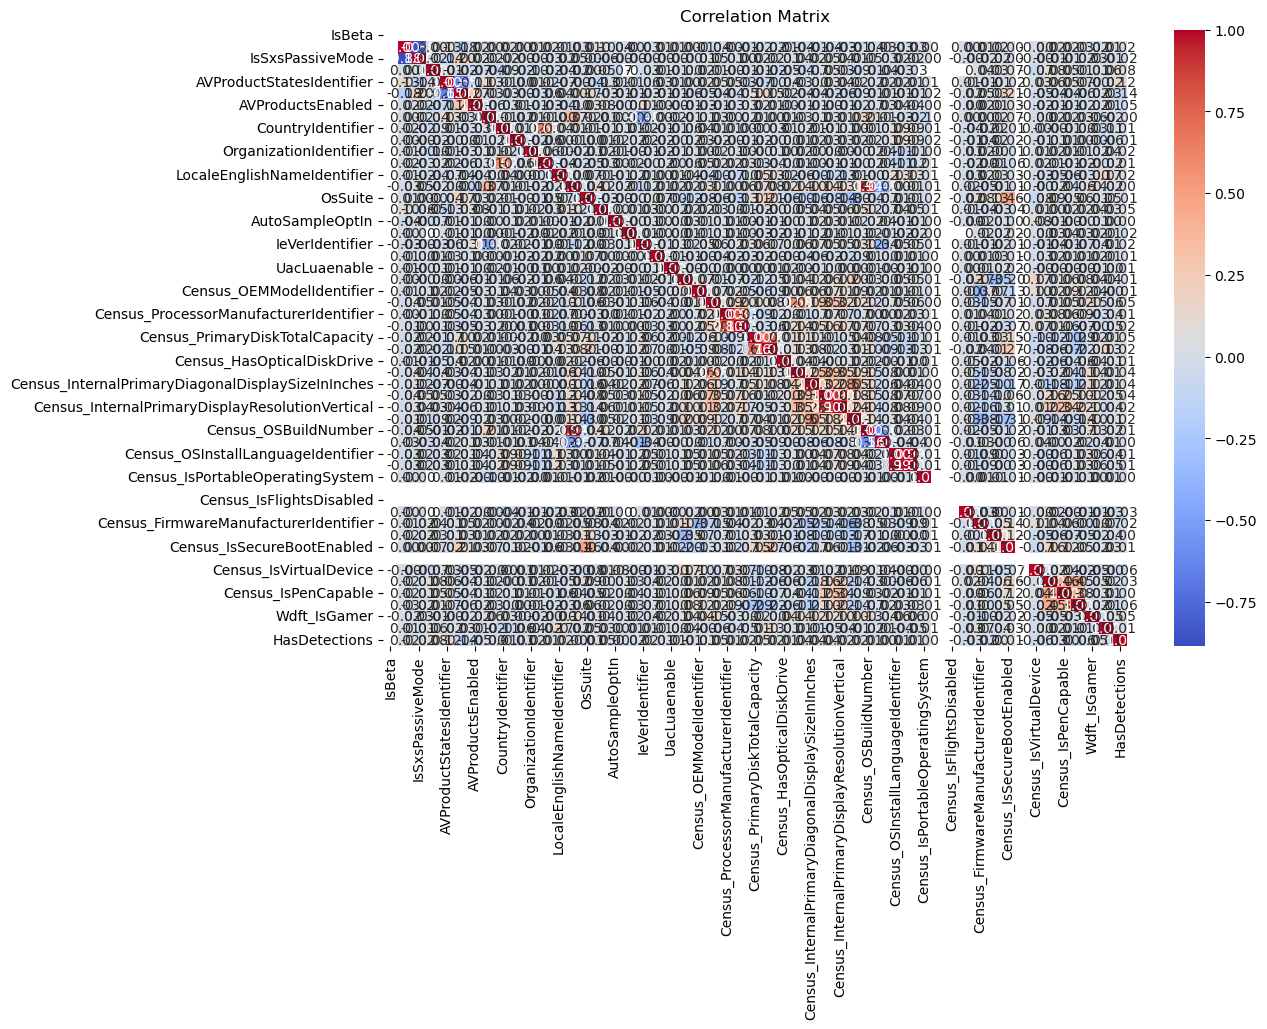

Using mean for RtpStateBitfield due to low correlation: 0.021948170148127468
Using mean for DefaultBrowsersIdentifier due to low correlation: 0.07612056741740796
Using median for AVProductStatesIdentifier due to high correlation: 0.12162486120418878
Using median for AVProductsInstalled due to high correlation: 0.1372953602899072
Using mean for AVProductsEnabled due to low correlation: 0.04644171966508885
Using mean for CityIdentifier due to low correlation: 0.01181915633790153
Using mean for OrganizationIdentifier due to low correlation: 0.01688434632768754
Using mean for IsProtected due to low correlation: 0.04645636795344689
Using mode for PuaMode as it is categorical
Using mean for SMode due to low correlation: 0.0233055781242909
Using mean for IeVerIdentifier due to low correlation: 0.018786161487862683
Using mode for SmartScreen as it is categorical
Using mean for Firewall due to low correlation: 0.005836452760359046
Using mean for UacLuaenable due to low correlation: 0.0140446260

In [2]:
# notebooks/00_initial_analysis.ipynb

import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data.load_data import load_data, sample_data
from data.data_analysis import generate_summary_statistics, plot_correlation_heatmap, suggest_imputation_strategy, save_analysis_results
from config_loader import load_config
from utils import update_imputation_strategies
from tqdm.notebook import tqdm

# Load configuration
config = load_config('../config/paths.yaml')

# Load a smaller chunk of the data for initial analysis with progress bar
train_chunk = load_data(config['data_paths']['train_data'], nrows=100000)
test_chunk = load_data(config['data_paths']['test_data'], nrows=100000)

# Sample data for initial analysis using stratified sampling based on the target variable
train_sample = sample_data(train_chunk, n_samples=10000, stratify_col='HasDetections')
test_sample = sample_data(test_chunk, n_samples=10000)

# Generate summary statistics for train and test samples
train_summary_stats = generate_summary_statistics(train_sample)
test_summary_stats = generate_summary_statistics(test_sample)

# Print summary statistics
print("Train Summary Statistics:")
print(train_summary_stats)

print("\nTest Summary Statistics:")
print(test_summary_stats)

# Correlation Analysis
corr_matrix = plot_correlation_heatmap(train_sample)

# Suggest imputation strategies
imputation_strategies = suggest_imputation_strategy(train_summary_stats, corr_matrix)
print("\nSuggested Imputation Strategies:")
for col, strategy in imputation_strategies.items():
    print(f"{col}: {strategy}")

# Save summary statistics and imputation strategies to files
save_analysis_results(train_summary_stats, test_summary_stats, imputation_strategies, config['data_paths']['report_dir'])

# Update the imputation strategies YAML file
update_imputation_strategies('../config/imputation_strategies.yaml', imputation_strategies)


Loading ../data/raw/train.csv: 0it [00:00, ?it/s]/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
Loading ../data/raw/train.csv: 2it [00:00, 19.17it/s]/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
Loading ../data/raw/train.csv: 4it [00:00, 19.18it/s]/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for ob

Train Summary Statistics:
                                           count unique  \
MachineIdentifier                          10000  10000   
ProductName                                10000      2   
EngineVersion                              10000     34   
AppVersion                                 10000     57   
AvSigVersion                               10000   1616   
...                                          ...    ...   
Census_IsPenCapable                      10000.0    NaN   
Census_IsAlwaysOnAlwaysConnectedCapable   9923.0    NaN   
Wdft_IsGamer                              9674.0    NaN   
Wdft_RegionIdentifier                     9674.0    NaN   
HasDetections                            10000.0    NaN   

                                                                      top  \
MachineIdentifier                        007cd726f1d656da96f363fc9f5c2c38   
ProductName                                                  win8defender   
EngineVersion                     

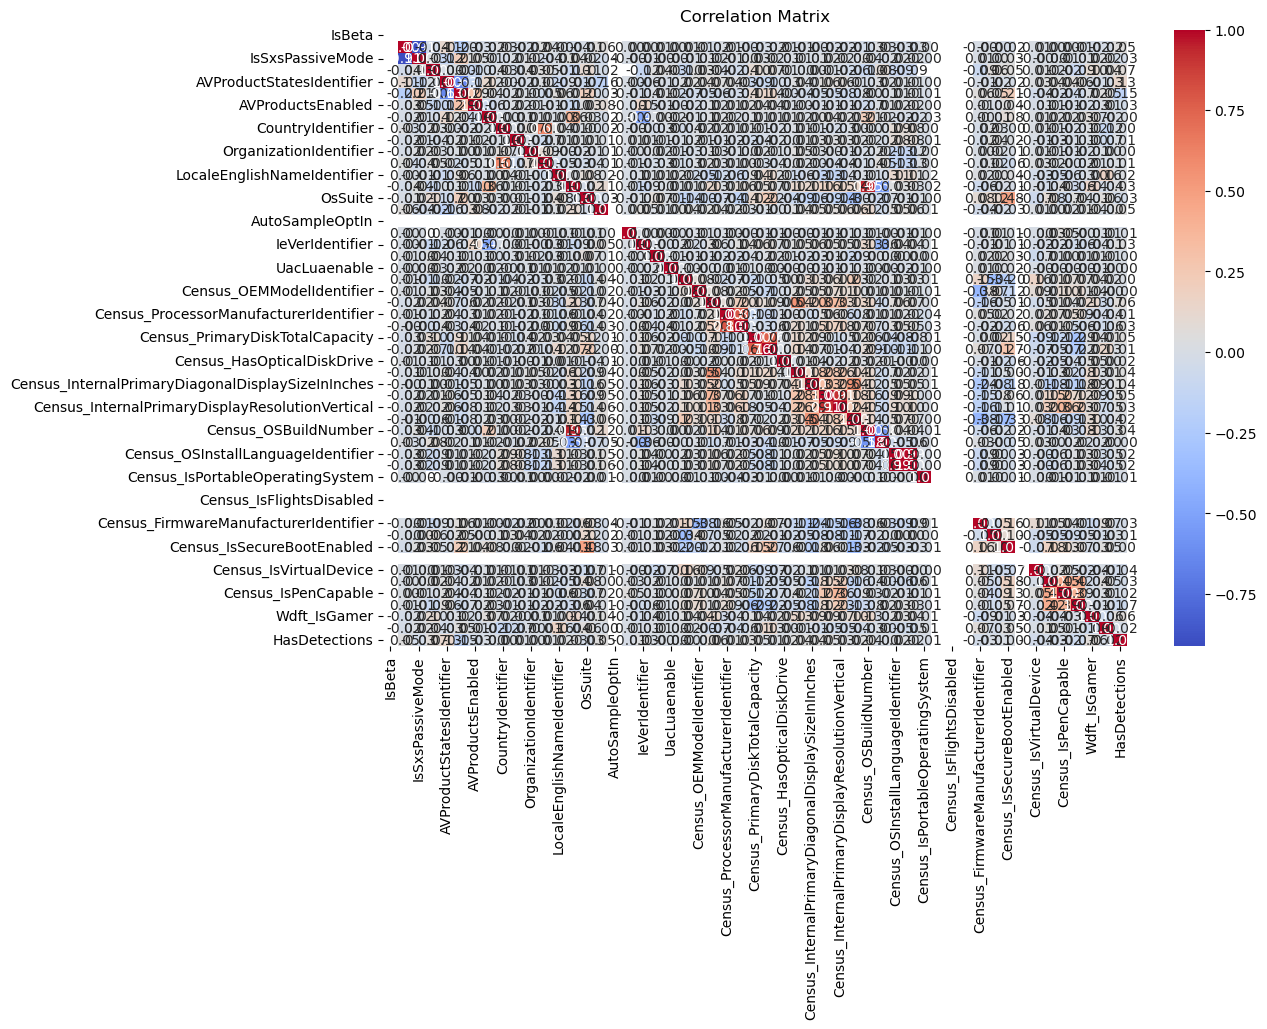

Using mean for RtpStateBitfield due to low correlation: 0.046422026043811716
Using mean for DefaultBrowsersIdentifier due to low correlation: 0.0687223440356669
Using median for AVProductStatesIdentifier due to high correlation: 0.13392611502207027
Using median for AVProductsInstalled due to high correlation: 0.15091942840641642
Using mean for AVProductsEnabled due to low correlation: 0.031723887400137846
Using mean for CityIdentifier due to low correlation: 0.011148467164478206
Using mean for OrganizationIdentifier due to low correlation: 0.003503790944450092
Using mean for IsProtected due to low correlation: 0.04754514493154033
Using mode for PuaMode as it is categorical
Using mean for SMode due to low correlation: 0.010409847062908466
Using mean for IeVerIdentifier due to low correlation: 0.031001498541159654
Using mode for SmartScreen as it is categorical
Using mean for Firewall due to low correlation: 0.0003703081716997032
Using mean for UacLuaenable due to low correlation: 0.0001

In [1]:
# # notebooks/00_initial_analysis.ipynb

# import sys
# sys.path.append('../src')

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from data.load_data import load_data, sample_data
# from data.data_analysis import generate_summary_statistics, plot_correlation_heatmap, suggest_imputation_strategy, save_analysis_results
# from config_loader import load_config
# from tqdm.notebook import tqdm

# # Load configuration
# config = load_config('../config/paths.yaml')

# # Load a smaller chunk of the data for initial analysis
# train_chunk = load_data(config['data_paths']['train_data'], nrows=100000)
# test_chunk = load_data(config['data_paths']['test_data'], nrows=100000)

# # Sample data for initial analysis using stratified sampling based on the target variable
# train_sample = sample_data(train_chunk, n_samples=10000, stratify_col='HasDetections')
# test_sample = sample_data(test_chunk, n_samples=10000)

# # Generate summary statistics for train and test samples
# train_summary_stats = generate_summary_statistics(train_sample)
# test_summary_stats = generate_summary_statistics(test_sample)

# # Print summary statistics
# print("Train Summary Statistics:")
# print(train_summary_stats)

# print("\nTest Summary Statistics:")
# print(test_summary_stats)

# # Correlation Analysis
# corr_matrix = plot_correlation_heatmap(train_sample)

# # Suggest imputation strategies
# imputation_strategies = suggest_imputation_strategy(train_summary_stats, corr_matrix)
# print("\nSuggested Imputation Strategies:")
# for col, strategy in imputation_strategies.items():
#     print(f"{col}: {strategy}")

# # Save summary statistics and imputation strategies to files
# save_analysis_results(train_summary_stats, test_summary_stats, imputation_strategies, config['data_paths']['report_dir'])


Loading ../data/raw/train.csv: 0it [00:00, ?it/s]/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
Loading ../data/raw/train.csv: 2it [00:00, 18.39it/s]/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
Loading ../data/raw/train.csv: 4it [00:00, 19.11it/s]/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for ob

Train Summary Statistics:
                                           count unique  \
MachineIdentifier                          10000  10000   
ProductName                                10000      2   
EngineVersion                              10000     34   
AppVersion                                 10000     64   
AvSigVersion                               10000   1656   
...                                          ...    ...   
Census_IsPenCapable                      10000.0    NaN   
Census_IsAlwaysOnAlwaysConnectedCapable   9910.0    NaN   
Wdft_IsGamer                              9665.0    NaN   
Wdft_RegionIdentifier                     9665.0    NaN   
HasDetections                            10000.0    NaN   

                                                                      top  \
MachineIdentifier                        01400df14af56ad2991053ba6af55c48   
ProductName                                                  win8defender   
EngineVersion                     

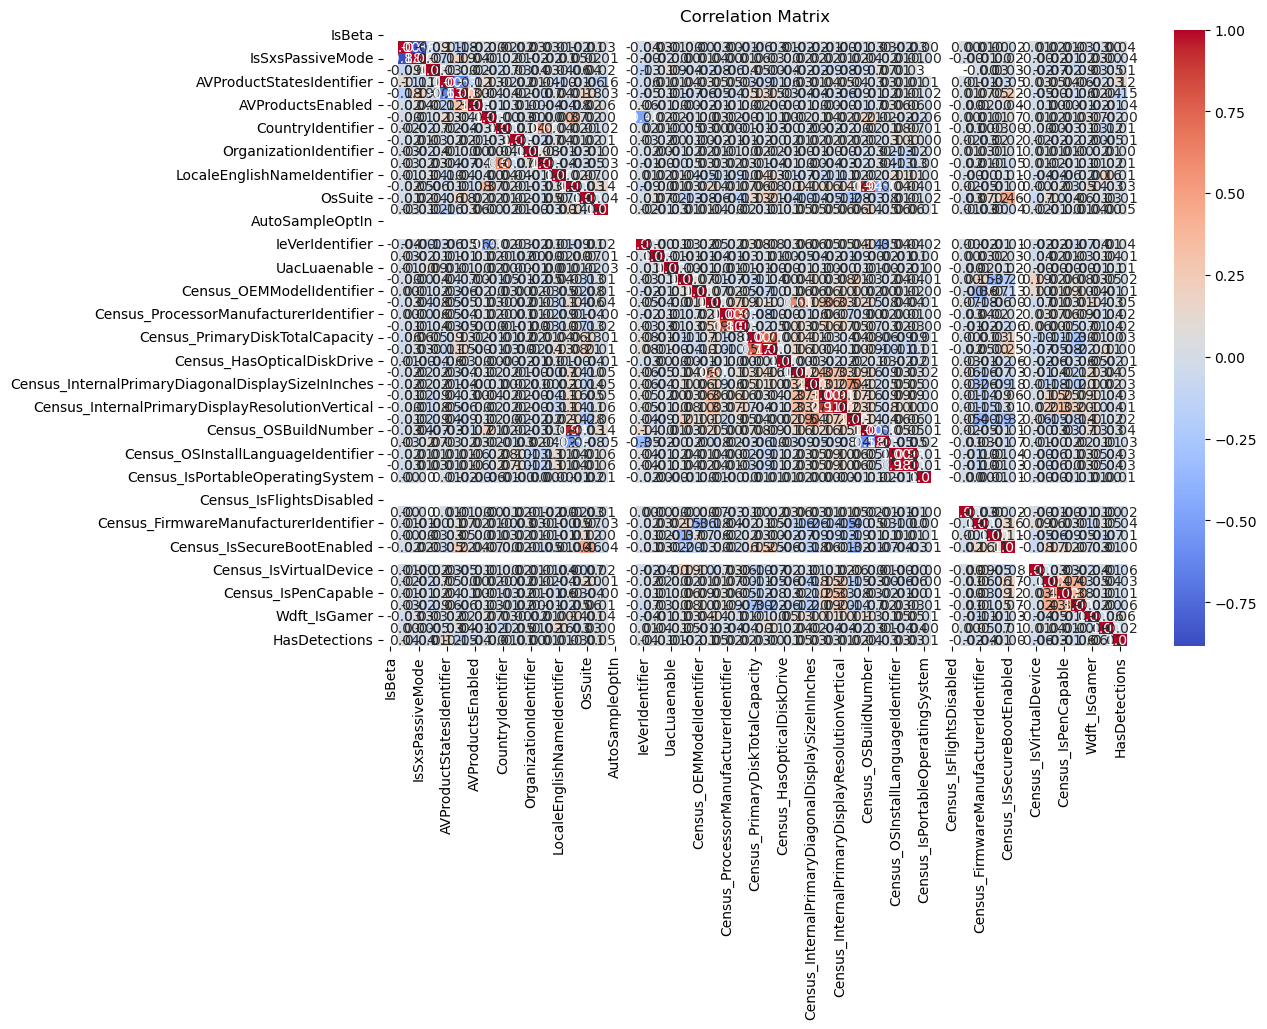


Suggested Imputation Strategies:
RtpStateBitfield: mean
DefaultBrowsersIdentifier: mean
AVProductStatesIdentifier: median
AVProductsInstalled: median
AVProductsEnabled: mean
CityIdentifier: mean
OrganizationIdentifier: mean
IsProtected: mean
PuaMode: mode
SMode: mean
IeVerIdentifier: mean
SmartScreen: mode
Firewall: mean
UacLuaenable: mean
Census_OEMNameIdentifier: mean
Census_OEMModelIdentifier: mean
Census_ProcessorCoreCount: mean
Census_ProcessorManufacturerIdentifier: mean
Census_ProcessorModelIdentifier: mean
Census_ProcessorClass: mode
Census_PrimaryDiskTotalCapacity: mean
Census_PrimaryDiskTypeName: mode
Census_SystemVolumeTotalCapacity: mean
Census_TotalPhysicalRAM: mean
Census_ChassisTypeName: mode
Census_InternalPrimaryDiagonalDisplaySizeInInches: mean
Census_InternalPrimaryDisplayResolutionHorizontal: mean
Census_InternalPrimaryDisplayResolutionVertical: mean
Census_InternalBatteryType: mode
Census_InternalBatteryNumberOfCharges: mean
Census_OSInstallLanguageIdentifier: mea

In [2]:
# notebooks/00_initial_analysis.ipynb

import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data.load_data import load_data, sample_data
from data.data_analysis import generate_summary_statistics, plot_correlation_heatmap, suggest_imputation_strategy, save_analysis_results
from config_loader import load_config
from tqdm.notebook import tqdm

# Load configuration
config = load_config('../config/paths.yaml')

# Load a smaller chunk of the data for initial analysis
train_chunk = load_data(config['data_paths']['train_data'], nrows=100000)
test_chunk = load_data(config['data_paths']['test_data'], nrows=100000)

# Sample data for initial analysis using stratified sampling based on the target variable
train_sample = sample_data(train_chunk, n_samples=10000, stratify_col='HasDetections')
test_sample = sample_data(test_chunk, n_samples=10000)

# Generate summary statistics for train and test samples
train_summary_stats = generate_summary_statistics(train_sample)
test_summary_stats = generate_summary_statistics(test_sample)

# Print summary statistics
print("Train Summary Statistics:")
print(train_summary_stats)

print("\nTest Summary Statistics:")
print(test_summary_stats)

# Correlation Analysis
corr_matrix = plot_correlation_heatmap(train_sample)

# Suggest imputation strategies
imputation_strategies = suggest_imputation_strategy(train_summary_stats, corr_matrix)
print("\nSuggested Imputation Strategies:")
for col, strategy in imputation_strategies.items():
    print(f"{col}: {strategy}")

# Save summary statistics and imputation strategies to files
save_analysis_results(train_summary_stats, test_summary_stats, imputation_strategies, config['data_paths']['report_dir'])


Loading ../data/raw/train.csv: 0it [00:00, ?it/s]/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
Loading ../data/raw/train.csv: 2it [00:00, 19.69it/s]/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
Loading ../data/raw/train.csv: 4it [00:00, 18.25it/s]/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for obj in iterable:
/opt/anaconda3/envs/data_science_environment/lib/python3.8/site-packages/tqdm/std.py:1181: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  for ob

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1223 to 87120
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  10000 non-null  object 
 1   ProductName                                        10000 non-null  object 
 2   EngineVersion                                      10000 non-null  object 
 3   AppVersion                                         10000 non-null  object 
 4   AvSigVersion                                       10000 non-null  object 
 5   IsBeta                                             10000 non-null  int64  
 6   RtpStateBitfield                                   9968 non-null   float64
 7   IsSxsPassiveMode                                   10000 non-null  int64  
 8   DefaultBrowsersIdentifier                          486 non-null    floa

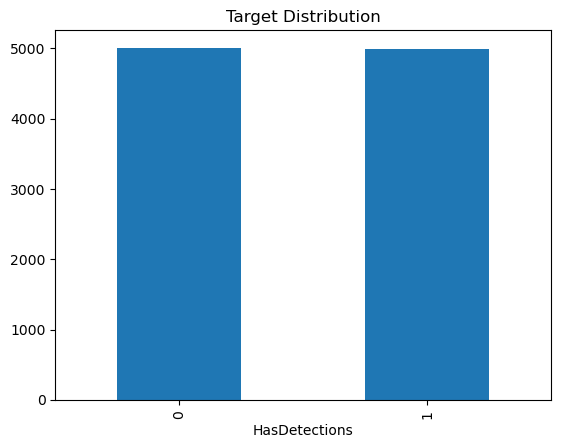

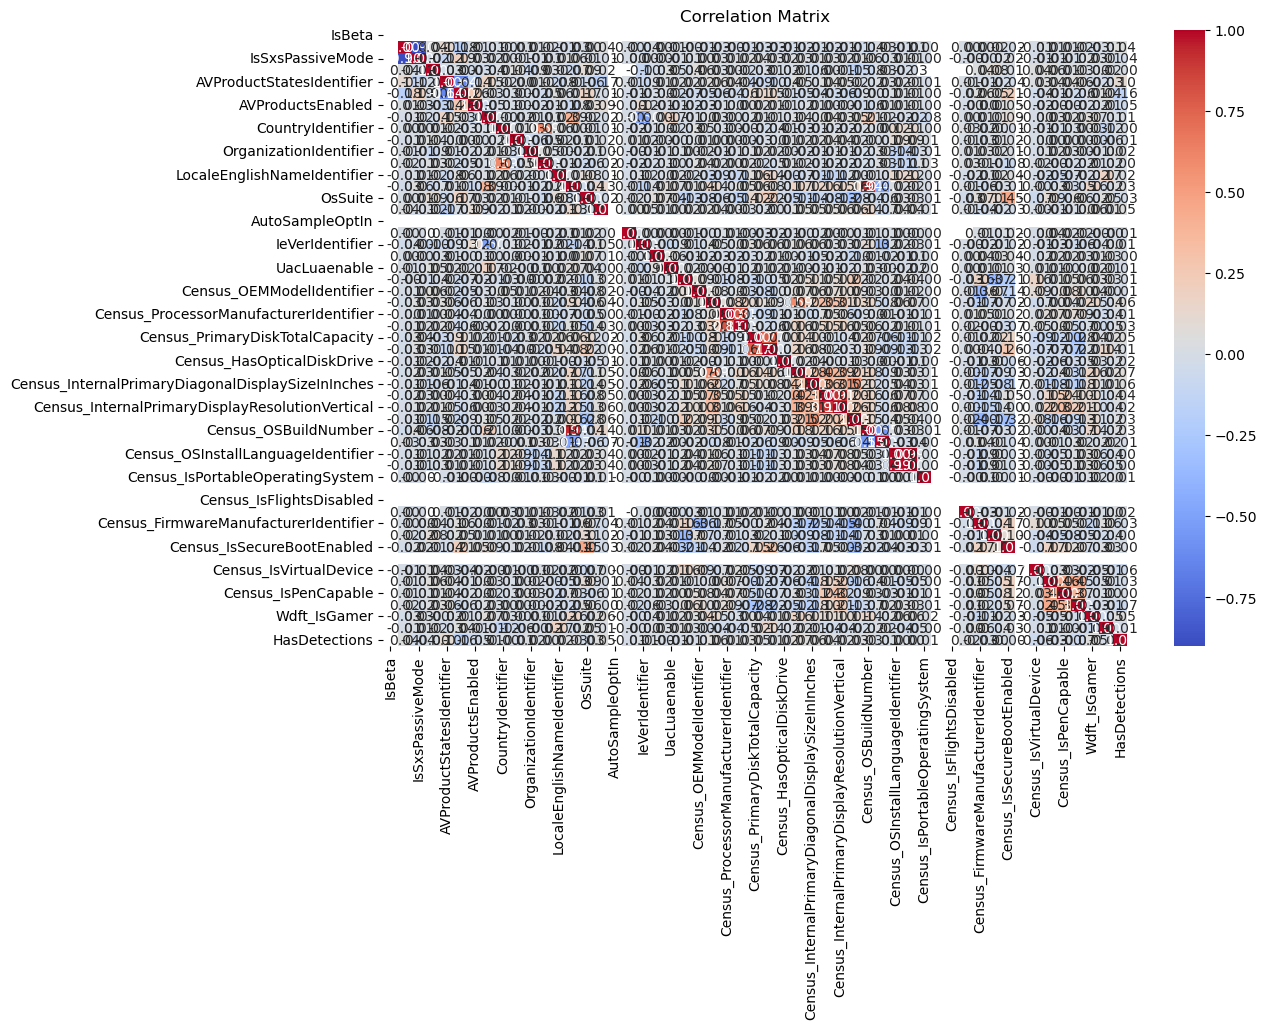

In [1]:
# notebooks/00_initial_analysis.ipynb

import sys
sys.path.append('../src')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from data.load_data import load_data, sample_data
from tqdm.notebook import tqdm

# Load a smaller chunk of the data for initial analysis
train_chunk = load_data('../data/raw/train.csv', nrows=100000)
test_chunk = load_data('../data/raw/test.csv', nrows=100000)

# Sample data for initial analysis using stratified sampling based on the target variable
train_sample = sample_data(train_chunk, n_samples=10000, stratify_col='HasDetections')
test_sample = sample_data(test_chunk, n_samples=10000)

# Basic Info
print("Train Data Info:")
print(train_sample.info())
print("\nTest Data Info:")
print(test_sample.info())

# Missing Values Summary
print("\nMissing Values in Train Data:")
missing_train = train_sample.isnull().sum()
print(missing_train[missing_train > 0])

print("\nMissing Values in Test Data:")
missing_test = test_sample.isnull().sum()
print(missing_test[missing_test > 0])

# Visualize target distribution
train_sample['HasDetections'].value_counts().plot(kind='bar')
plt.title('Target Distribution')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_cols = train_sample.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train_sample[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
